In [11]:
import titulos_negociaveis as tn
import cotahist as ch
import pandas as pd

# define an empty list
param = {
    'cotahist':{'zipPath': '/media/sf_repo/ohlc/cotahist/COTAHIST_A2019.ZIP', 'file': 'COTAHIST_A2019.TXT'}
,   'titneg':{'zipPath': '/media/sf_repo/ohlc/titneg/Titulos_Negociaveis.zip', 'file': 'TITULOS_NEGOCIAVEIS.TXT'}
}

p , e = tn.getItems(param['titneg']['zipPath'], param['titneg']['file'])
c = ch.getItems(param['cotahist']['zipPath'], param['cotahist']['file'])



In [20]:
c = pd.DataFrame(c, columns=['Pregao','Papel','Empresa','Fechamento','QNeg','QNegocida','Volume'])
c['Pregao'] = c['Pregao'].astype('datetime64[ns]') 
  

In [21]:
c.dtypes

Pregao        datetime64[ns]
Papel                 object
Empresa               object
Fechamento           float64
QNeg                   int64
QNegocida              int64
Volume               float64
dtype: object

In [33]:
cRel = c[(c['Pregao'] == '2019-08-16') & (c['QNeg'] > 5000)] # liquidez


In [44]:
tickers = [ x + '.SA' for x in cRel['Papel'].to_list()]

In [46]:
import numpy as np
from pandas_datareader import data as wb
prices=pd.DataFrame()
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2017-1-1')['Adj Close']

In [56]:
pn = prices/prices.iloc[0]*100

In [60]:
pn.tail()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BIDI4.SA,BIDI11.SA,...,TIET11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-19,124.403541,NaN,298.099892,178.939265,153.203805,182.957365,141.853341,71.080660,NaN,NaN,...,NaN,163.341630,232.533364,53.081980,176.532133,189.285222,146.864062,177.981788,203.563491,NaN
2019-08-20,123.296864,NaN,299.803309,178.779591,151.624378,181.171872,141.553803,69.871517,NaN,NaN,...,NaN,161.432805,234.102476,53.048491,181.783090,190.109138,148.797586,186.708976,204.105359,NaN
2019-08-21,122.385474,NaN,300.196416,188.997843,155.362346,184.742857,142.452418,70.130618,NaN,NaN,...,NaN,163.205295,237.240702,55.995628,185.783814,191.453437,150.170675,189.882497,208.259707,NaN
2019-08-22,120.237219,NaN,297.903350,187.972152,152.150854,182.343598,139.499804,72.548913,NaN,NaN,...,NaN,161.705489,232.315435,57.402213,187.784189,190.325956,147.396478,182.477616,205.279408,NaN
2019-08-23,118.674853,NaN,285.520743,180.799785,147.833772,177.489281,137.916528,70.044248,NaN,NaN,...,NaN,160.205695,231.225776,54.250857,181.783090,187.290451,145.995371,180.361935,202.299110,NaN


In [61]:
# import matplotlib.pyplot as plt
# (prices/prices.iloc[0]*100).plot(figsize=(15,5))
# plt.ylabel('NORMALIZED PRICES')
# plt.xlabel('DATE')
# plt.show()
prices/prices.shift(periods=21,fill_value=0)

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BIDI4.SA,BIDI11.SA,...,TIET11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-03,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-04,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-05,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-06,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-09,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-10,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-11,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2017-01-12,inf,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,...,NaN,inf,inf,inf,inf,inf,inf,inf,inf,NaN


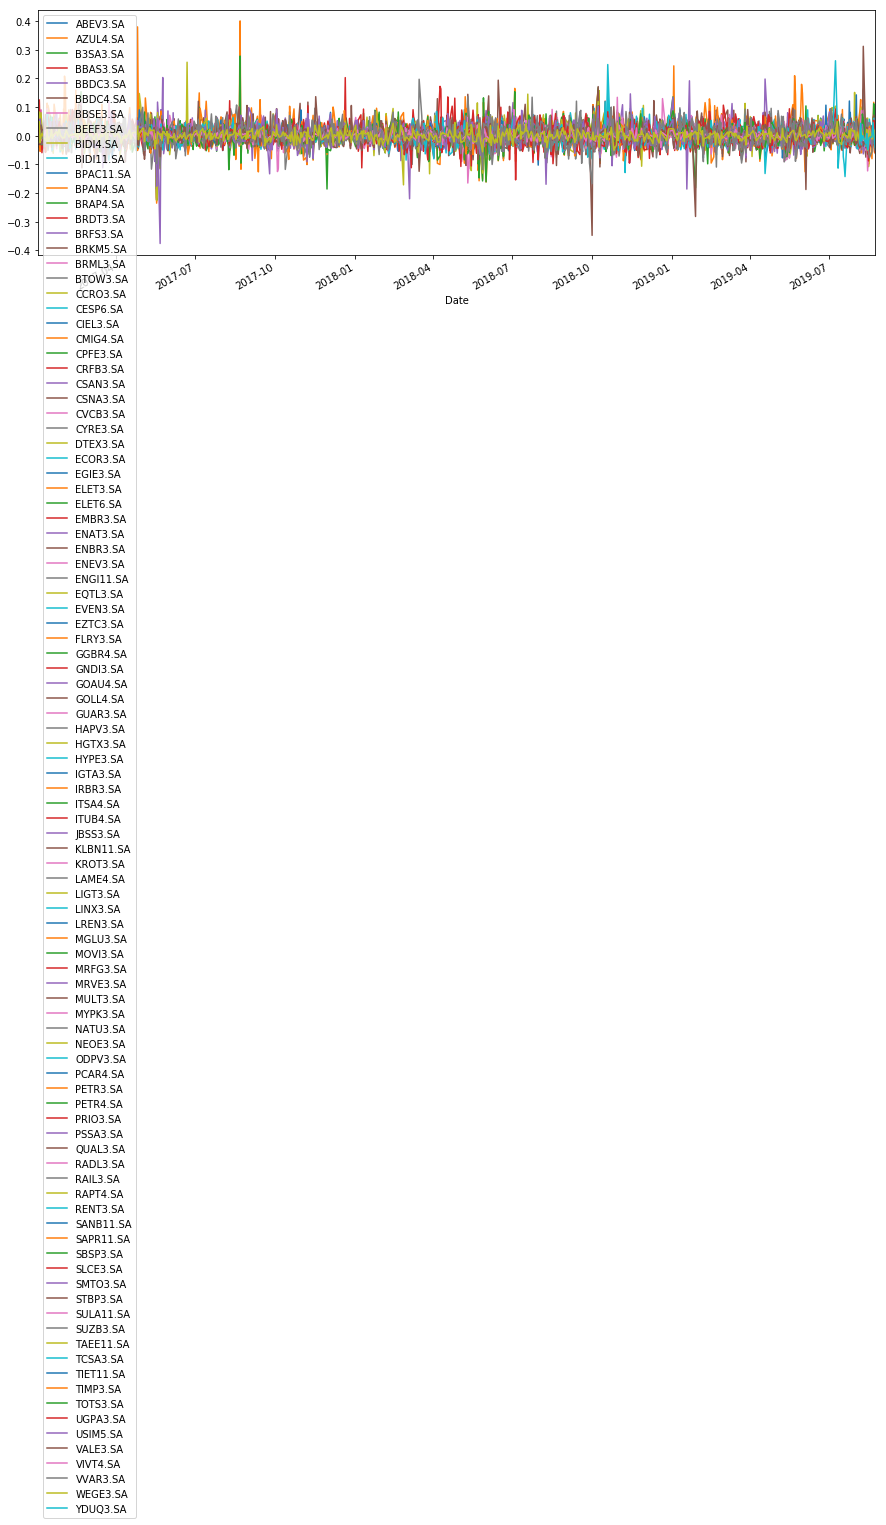

In [63]:
log_returns=np.log(prices/prices.shift(1))
log_returns.plot(figsize=(15,5))
# plt.ylabel('LOG DAILY RETURNS')
# plt.xlabel('DATE')
# plt.show()

In [50]:
log_returns.mean()*250

ABEV3.SA     0.064855
AZUL4.SA     0.328278
B3SA3.SA     0.397403
BBAS3.SA     0.224326
BBDC3.SA     0.148075
BBDC4.SA     0.217326
BBSE3.SA     0.121772
BEEF3.SA    -0.134865
BIDI4.SA     1.591838
BIDI11.SA         NaN
BPAC11.SA         NaN
BPAN4.SA     0.761889
BRAP4.SA     0.302388
BRDT3.SA     0.422139
BRFS3.SA    -0.079029
BRKM5.SA    -0.035710
BRML3.SA     0.134905
BTOW3.SA     0.540057
CCRO3.SA     0.033209
CESP6.SA     0.284029
CIEL3.SA    -0.357534
CMIG4.SA     0.299099
CPFE3.SA     0.103286
CRFB3.SA     0.197386
CSAN3.SA     0.125682
CSNA3.SA     0.148566
CVCB3.SA     0.322538
CYRE3.SA     0.366830
DTEX3.SA     0.283659
ECOR3.SA     0.191086
               ...   
PCAR4.SA     0.189092
PETR3.SA     0.189924
PETR4.SA     0.212729
PRIO3.SA     0.711881
PSSA3.SA     0.337867
QUAL3.SA     0.215491
RADL3.SA     0.155757
RAIL3.SA     0.484582
RAPT4.SA     0.388147
RENT3.SA     0.539791
SANB11.SA    0.154439
SAPR11.SA         NaN
SBSP3.SA     0.268099
SLCE3.SA     0.499701
SMTO3.SA  

In [64]:
log_returns.std()

ABEV3.SA     0.013841
AZUL4.SA     0.024921
B3SA3.SA     0.019726
BBAS3.SA     0.023984
BBDC3.SA     0.019439
BBDC4.SA     0.018486
BBSE3.SA     0.015791
BEEF3.SA     0.021932
BIDI4.SA     0.035110
BIDI11.SA         NaN
BPAC11.SA         NaN
BPAN4.SA     0.034348
BRAP4.SA     0.026010
BRDT3.SA     0.025696
BRFS3.SA     0.025134
BRKM5.SA     0.022473
BRML3.SA     0.019775
BTOW3.SA     0.033714
CCRO3.SA     0.022688
CESP6.SA     0.019408
CIEL3.SA     0.024815
CMIG4.SA     0.026479
CPFE3.SA     0.013518
CRFB3.SA     0.017467
CSAN3.SA     0.020496
CSNA3.SA     0.031559
CVCB3.SA     0.022376
CYRE3.SA     0.022721
DTEX3.SA     0.023785
ECOR3.SA     0.023688
               ...   
PCAR4.SA     0.019654
PETR3.SA     0.024850
PETR4.SA     0.026572
PRIO3.SA     0.032395
PSSA3.SA     0.018027
QUAL3.SA     0.029581
RADL3.SA     0.018252
RAIL3.SA     0.022678
RAPT4.SA     0.027554
RENT3.SA     0.021111
SANB11.SA    0.020665
SAPR11.SA         NaN
SBSP3.SA     0.022006
SLCE3.SA     0.024737
SMTO3.SA  

In [52]:
log_returns.corr()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BIDI4.SA,BIDI11.SA,...,TIET11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
ABEV3.SA,1.000000,0.313860,0.363494,0.307365,0.373571,0.373988,0.237242,0.171952,0.027726,NaN,...,NaN,0.305170,0.157899,0.233362,0.293679,0.102054,0.298315,0.143547,0.297428,0.476618
AZUL4.SA,0.313860,1.000000,0.486883,0.525846,0.505374,0.512508,0.385398,0.164301,0.175399,NaN,...,NaN,0.359675,0.206441,0.358014,0.397402,0.132934,0.346687,0.353346,0.250820,0.674881
B3SA3.SA,0.363494,0.486883,1.000000,0.632704,0.638633,0.648303,0.510485,0.218592,0.159995,NaN,...,NaN,0.410300,0.236449,0.433057,0.460075,0.178824,0.412134,0.286534,0.386014,0.714495
BBAS3.SA,0.307365,0.525846,0.632704,1.000000,0.741166,0.782237,0.495504,0.166121,0.138554,NaN,...,NaN,0.404753,0.236758,0.431106,0.564732,0.212445,0.438079,0.358793,0.349692,0.627148
BBDC3.SA,0.373571,0.505374,0.638633,0.741166,1.000000,0.932210,0.533360,0.159684,0.108927,NaN,...,NaN,0.441059,0.251455,0.453696,0.520031,0.187290,0.500194,0.310146,0.437576,0.598111
BBDC4.SA,0.373988,0.512508,0.648303,0.782237,0.932210,1.000000,0.520702,0.180387,0.104109,NaN,...,NaN,0.479020,0.257018,0.467791,0.555423,0.200007,0.499160,0.311548,0.434867,0.527140
BBSE3.SA,0.237242,0.385398,0.510485,0.495504,0.533360,0.520702,1.000000,0.145691,0.173534,NaN,...,NaN,0.280776,0.208220,0.318762,0.312018,0.123278,0.372565,0.208543,0.342565,0.515319
BEEF3.SA,0.171952,0.164301,0.218592,0.166121,0.159684,0.180387,0.145691,1.000000,0.003954,NaN,...,NaN,0.133510,0.104986,0.156639,0.170427,0.131625,0.147182,0.141456,0.174850,0.539899
BIDI4.SA,0.027726,0.175399,0.159995,0.138554,0.108927,0.104109,0.173534,0.003954,1.000000,NaN,...,NaN,0.057697,0.198357,0.097667,0.171164,0.053273,-0.084305,0.132525,0.070458,0.263282
BIDI11.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
